<a href="https://colab.research.google.com/github/ky13-troj/youtube_data_analysis/blob/main/youtube_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
!pip install emoji

     |████████████████████████████████| 133kB 6.3MB/s 


In [105]:
!pip install emoji-unicode

  Created wheel for emoji-unicode: filename=emoji_unicode-0.4-cp37-none-any.whl size=35545 sha256=187ab202fe601cab28c24bb40039ce518accdb05b0236a380423b52eeec4fc96
  Stored in directory: /root/.cache/pip/wheels/db/5a/31/ac08dce6f980eabb8ed134acc775804cb03ed5f07a1c1e3a0c
Successfully built emoji-unicode


In [168]:
!pip install plotly

In [170]:
#importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import re
import emoji
from plotly.offline import iplot
import plotly.graph_objs as go

In [110]:
comments = pd.read_csv('/content/drive/MyDrive/collab/youtube_data_analysis/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [5]:
comments.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [11]:
TextBlob('Its more accurate to call it the M+ (1000) be...	').sentiment.polarity

0.45000000000000007

In [112]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [138]:
comments.dropna(inplace=True)

In [19]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [118]:
polarity = []
for i in comments['comment_text'] :
  polarity.append(TextBlob(i).sentiment.polarity)

In [22]:
comments['Polarity'] = polarity

In [25]:
comments.head(20)

video_id  ...  Polarity
0   jt2OHQh0HoQ  ...  0.450000
1   jt2OHQh0HoQ  ...  0.000000
2   jt2OHQh0HoQ  ...  0.000000
3   jt2OHQh0HoQ  ...  0.000000
4   jt2OHQh0HoQ  ...  1.000000
5   jt2OHQh0HoQ  ...  0.300000
6   jt2OHQh0HoQ  ...  0.000000
7   jt2OHQh0HoQ  ... -0.100000
8   jt2OHQh0HoQ  ...  0.028571
9   jt2OHQh0HoQ  ...  0.500000
10  jt2OHQh0HoQ  ...  0.500000
11  jt2OHQh0HoQ  ...  0.000000
12  jt2OHQh0HoQ  ...  0.300000
13  jt2OHQh0HoQ  ...  0.026563
14  jt2OHQh0HoQ  ...  0.500000
15  jt2OHQh0HoQ  ...  0.500000
16  jt2OHQh0HoQ  ...  0.200000
17  jt2OHQh0HoQ  ...  0.250000
18  jt2OHQh0HoQ  ...  0.500000
19  jt2OHQh0HoQ  ...  0.300000

[20 rows x 5 columns]

In [28]:
comments_positive = comments[comments['Polarity'] == 1]

In [29]:
comments_positive.shape

(20400, 5)

In [30]:
comments_positive.head()

video_id  ... Polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0

[5 rows x 5 columns]

In [32]:
stopwords = set(STOPWORDS)

In [35]:
total_comments = ' '.join(comments_positive['comment_text'])

In [36]:
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [39]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

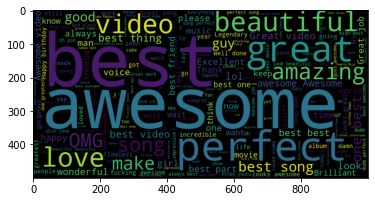

In [41]:
plt.imshow(wordcloud)

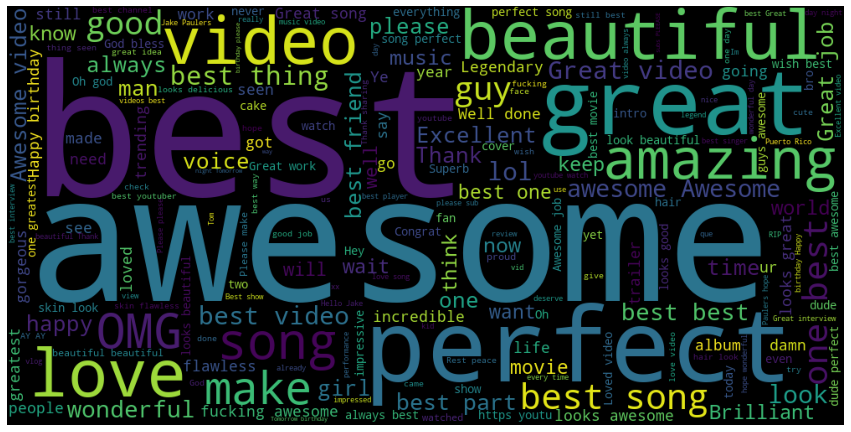

In [44]:
plt.figure(figsize=(15,9))
plt.axis('off')
plt.imshow(wordcloud)

In [46]:
comments_negative = comments[comments['Polarity'] == -1]

In [47]:
comments_negative.shape

(3339, 5)

In [48]:
comments_negative.head()

video_id  ... Polarity
1387  ql0Op1VcELw  ...     -1.0
1394  ql0Op1VcELw  ...     -1.0
1530  -Ifnaxi2LQg  ...     -1.0
1745  F2uJvwiSZAQ  ...     -1.0
1793  F2uJvwiSZAQ  ...     -1.0

[5 rows x 5 columns]

In [49]:
total_neg_comments = ' '.join(comments_negative['comment_text'])

In [50]:
neg_wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_neg_comments)

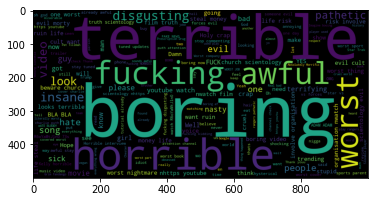

In [51]:
plt.imshow(neg_wordcloud)

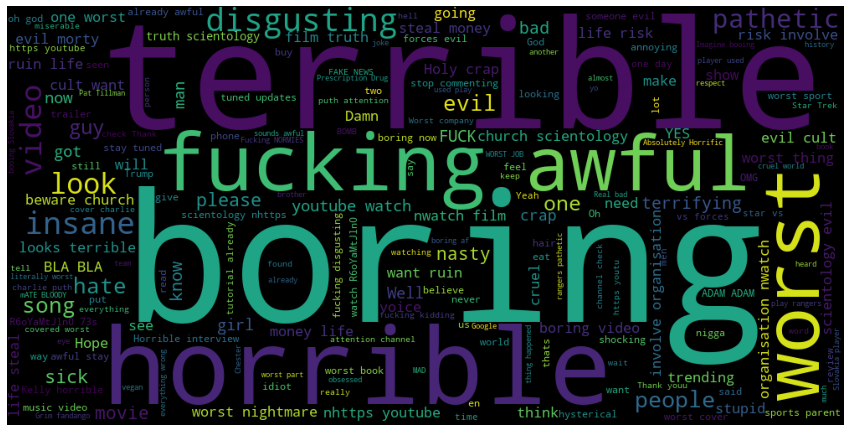

In [52]:
plt.figure(figsize=(15,9))
plt.axis('off')
plt.imshow(neg_wordcloud)

In [53]:
videos = pd.read_csv('/content/drive/MyDrive/collab/youtube_data_analysis/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [54]:
videos.head()

video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [55]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [56]:
tags = ' '.join(videos['tags'])

In [57]:
tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [62]:
filterred_tags = re.sub('[^a-zA-Z]',' ',tags)

In [63]:
filterred_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [64]:
filt_tags = re.sub(' +',' ',filterred_tags)

In [65]:
filt_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [66]:
tag_wordcloud = WordCloud(width = 1000,height=500,stopwords=stopwords).generate(filt_tags)

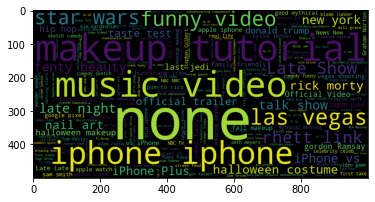

In [67]:
plt.imshow(tag_wordcloud)

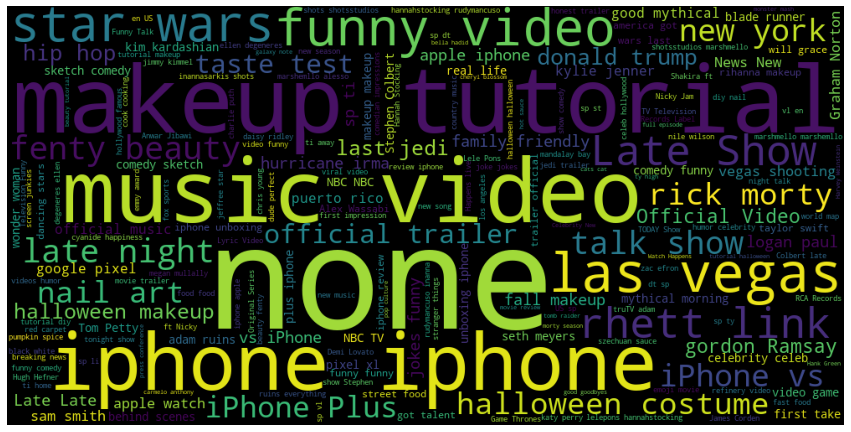

In [68]:
plt.figure(figsize=(15,9))
plt.axis('off')
plt.imshow(tag_wordcloud)

Text(0.5, 1.0, 'Regression Plot for Views vs Likes')

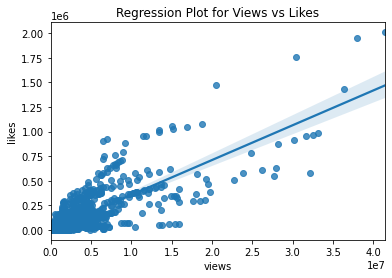

In [70]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression Plot for Views vs Likes')

Text(0.5, 1.0, 'Regression plot for Views vs Dislikes')

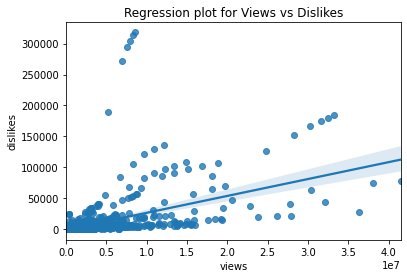

In [72]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for Views vs Dislikes')

In [74]:
df_corr = videos[['views','likes','dislikes']]

In [76]:
cor = df_corr.corr()

In [77]:
cor

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

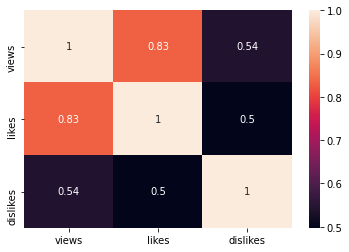

In [79]:
sns.heatmap(cor,annot=True)

In [145]:
comments.dropna(axis=0,subset=['comment_text'],inplace=True)

In [151]:
str=''
for i in comments['comment_text']:
  list = [c for c in i if c in emoji.UNICODE_EMOJI['en']]
  for ele in list :
    str = str+ele

In [152]:
len(str)

333278

In [153]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊😊😍😊❤❤❤❤😍

In [156]:
result={}
for i in set(str):
  result[i] = str.count(i)

In [157]:
result

{'🆔': 5,
 '🧖': 5,
 '🐃': 16,
 '🥙': 7,
 '🏑': 12,
 '🎧': 183,
 '🈳': 5,
 '🏼': 2961,
 '🚺': 6,
 '💶': 64,
 '☁': 71,
 '🕔': 7,
 '⛰': 9,
 '🐏': 16,
 '🖋': 7,
 '🚑': 10,
 '↖': 5,
 '🐽': 21,
 '🥉': 5,
 '⚱': 23,
 '🌼': 92,
 '🏽': 1875,
 '🚱': 7,
 '🚻': 5,
 '🐕': 192,
 '🎮': 16,
 '🧣': 1,
 '⚠': 81,
 '🌒': 18,
 '📔': 10,
 '🏫': 25,
 '💞': 1393,
 '😵': 260,
 '⛽': 30,
 '🤓': 187,
 '🏵': 28,
 '🗃': 5,
 '💄': 191,
 '📗': 9,
 '🐰': 85,
 '😷': 177,
 '⚖': 12,
 '🈶': 18,
 '🌠': 64,
 '📏': 20,
 '♦': 5,
 '🕝': 8,
 '🌊': 158,
 '🥕': 7,
 '🖍': 4,
 'ℹ': 5,
 '🍞': 19,
 '🐄': 35,
 '🌧': 24,
 '🕥': 8,
 '📹': 31,
 '🕒': 7,
 '🆎': 5,
 '😃': 1327,
 '⛷': 19,
 '📟': 11,
 '🐤': 154,
 '🗽': 23,
 '🚦': 6,
 '🏁': 38,
 '🐠': 45,
 '😢': 2074,
 '✨': 1298,
 '🌎': 127,
 '♠': 5,
 '🗒': 5,
 '⏹': 4,
 '🎑': 6,
 '🛤': 5,
 '⏺': 5,
 '🚠': 5,
 '👐': 127,
 '🥅': 2,
 '💤': 84,
 '💠': 11,
 '🛑': 6,
 '🔋': 22,
 '🤭': 16,
 '📿': 14,
 '⬛': 153,
 '💿': 929,
 '🐞': 100,
 '😫': 782,
 '🌱': 35,
 '🦃': 16,
 '⏬': 6,
 '🕷': 99,
 '👘': 18,
 '🏛': 15,
 '📲': 17,
 '🏏': 8,
 '🎂': 124,
 '📬': 12,
 '🛐': 13,
 '🏤': 6,
 '💩': 638

In [160]:
final = {}
for key,value in sorted(result.items(),key = lambda item:item[1]) :
  final[key]=value

In [161]:
final

{'🧣': 1,
 '🥚': 1,
 '🦓': 1,
 '🤽': 1,
 '🥌': 1,
 '🤹': 1,
 '🛒': 1,
 '🥨': 1,
 '🧠': 1,
 '🥟': 1,
 '🤺': 1,
 '🦏': 1,
 '🧤': 1,
 '🛷': 1,
 '🤾': 1,
 '🤟': 1,
 '🥡': 1,
 '🥜': 1,
 '🥅': 2,
 '🧝': 2,
 '🦖': 2,
 '🤱': 2,
 '🦔': 2,
 '🧡': 2,
 '🦕': 2,
 '🧒': 2,
 '🎌': 2,
 '🧘': 2,
 '🧢': 2,
 '🧛': 2,
 '🥄': 3,
 '🤫': 3,
 '🧐': 3,
 '🤯': 3,
 '🥖': 3,
 '🤨': 3,
 '🖍': 4,
 '⏹': 4,
 '🦍': 4,
 '⚗': 4,
 '🦐': 4,
 '🧟': 4,
 '🤵': 4,
 '⏲': 4,
 '☸': 4,
 '♾': 4,
 '🛬': 4,
 '🛢': 4,
 '☦': 4,
 '🗄': 4,
 '🖇': 4,
 '🏷': 4,
 '🛣': 4,
 '🗂': 4,
 '🏌': 4,
 '🥞': 4,
 '💹': 4,
 '⏸': 4,
 '🥈': 4,
 '⚧': 4,
 '🦆': 4,
 '♟': 4,
 '🤬': 4,
 '🗓': 4,
 '⏯': 4,
 '⏏': 4,
 '🥝': 4,
 '⚙': 4,
 '🆔': 5,
 '🧖': 5,
 '🈳': 5,
 '↖': 5,
 '🥉': 5,
 '🚻': 5,
 '🗃': 5,
 '♦': 5,
 'ℹ': 5,
 '🆎': 5,
 '♠': 5,
 '🗒': 5,
 '🛤': 5,
 '⏺': 5,
 '🚠': 5,
 '🔖': 5,
 '❎': 5,
 '⚒': 5,
 '🚉': 5,
 '☂': 5,
 '🈯': 5,
 '㊙': 5,
 '🥛': 5,
 '🔃': 5,
 '🏮': 5,
 '⛴': 5,
 '🦒': 5,
 '🚁': 5,
 '↩': 5,
 '🈹': 5,
 '⛸': 5,
 '◽': 5,
 '🔁': 5,
 '🆖': 5,
 '➿': 5,
 '🔄': 5,
 '🈴': 5,
 '🕎': 5,
 '🈂': 5,
 '🧜': 5,
 '🚛': 5,
 '🔠': 5,
 '◻': 5,
 

In [162]:
keys = [*final.keys()]

In [163]:
keys

['🧣',
 '🥚',
 '🦓',
 '🤽',
 '🥌',
 '🤹',
 '🛒',
 '🥨',
 '🧠',
 '🥟',
 '🤺',
 '🦏',
 '🧤',
 '🛷',
 '🤾',
 '🤟',
 '🥡',
 '🥜',
 '🥅',
 '🧝',
 '🦖',
 '🤱',
 '🦔',
 '🧡',
 '🦕',
 '🧒',
 '🎌',
 '🧘',
 '🧢',
 '🧛',
 '🥄',
 '🤫',
 '🧐',
 '🤯',
 '🥖',
 '🤨',
 '🖍',
 '⏹',
 '🦍',
 '⚗',
 '🦐',
 '🧟',
 '🤵',
 '⏲',
 '☸',
 '♾',
 '🛬',
 '🛢',
 '☦',
 '🗄',
 '🖇',
 '🏷',
 '🛣',
 '🗂',
 '🏌',
 '🥞',
 '💹',
 '⏸',
 '🥈',
 '⚧',
 '🦆',
 '♟',
 '🤬',
 '🗓',
 '⏯',
 '⏏',
 '🥝',
 '⚙',
 '🆔',
 '🧖',
 '🈳',
 '↖',
 '🥉',
 '🚻',
 '🗃',
 '♦',
 'ℹ',
 '🆎',
 '♠',
 '🗒',
 '🛤',
 '⏺',
 '🚠',
 '🔖',
 '❎',
 '⚒',
 '🚉',
 '☂',
 '🈯',
 '㊙',
 '🥛',
 '🔃',
 '🏮',
 '⛴',
 '🦒',
 '🚁',
 '↩',
 '🈹',
 '⛸',
 '◽',
 '🔁',
 '🆖',
 '➿',
 '🔄',
 '🈴',
 '🕎',
 '🈂',
 '🧜',
 '🚛',
 '🔠',
 '◻',
 '⛱',
 '🔲',
 '🔤',
 '🌫',
 '🈁',
 '⚾',
 '🖼',
 '🤮',
 '🗳',
 '🗞',
 '🛋',
 '🗜',
 '🔢',
 '🔂',
 '✡',
 '↔',
 '⌨',
 '↕',
 'Ⓜ',
 '🔳',
 '↪',
 '⛏',
 '🖊',
 '🖲',
 '🚎',
 '🈵',
 '🔡',
 '🛂',
 '🈲',
 '🔚',
 '🛥',
 '🔣',
 '🔼',
 '🖨',
 '🎐',
 '🚟',
 '🕹',
 '⛩',
 '🚺',
 '🚦',
 '🎑',
 '🛑',
 '⏬',
 '🏤',
 '🚈',
 '⤵',
 '⏭',
 '🎟',
 '🚐',
 '㊗',
 '🔀',
 '🧙',
 '⏫',
 '🏓',
 '🕴',
 '🚾'

In [164]:
values = [*final.values()]

In [165]:
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [166]:
df = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [167]:
df

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947

In [171]:
trace = go.Bar(x=df['chars'],y=df['num'])

In [172]:
iplot([trace])